In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [2]:
BASE_PATH = r'D:\CodeClause internship\utkface_aligned_cropped\UTKFace'
gender_list=[]
age_list=[]
img_paths = []
for filename in os.listdir(BASE_PATH):
    img_path = os.path.join(BASE_PATH,filename)
    temp = filename.split('_')
    age_list.append(int(temp[0]))
    gender_list.append(int(temp[1]))
    img_paths.append(img_path)

In [3]:
df = pd.DataFrame()
df['image'], df['gender'], df['age'] = img_paths, gender_list, age_list
df.head()

,image,gender,age
0,D:\CodeClause internship\utkface_aligned_cropp...,0,100
1,D:\CodeClause internship\utkface_aligned_cropp...,0,100
2,D:\CodeClause internship\utkface_aligned_cropp...,1,100
3,D:\CodeClause internship\utkface_aligned_cropp...,1,100
4,D:\CodeClause internship\utkface_aligned_cropp...,1,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   23708 non-null  object
 1   gender  23708 non-null  int64 
 2   age     23708 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 555.8+ KB


In [5]:
gender_dict = {0:'Male', 1:'Female'}

<Axes: xlabel='age', ylabel='Density'>

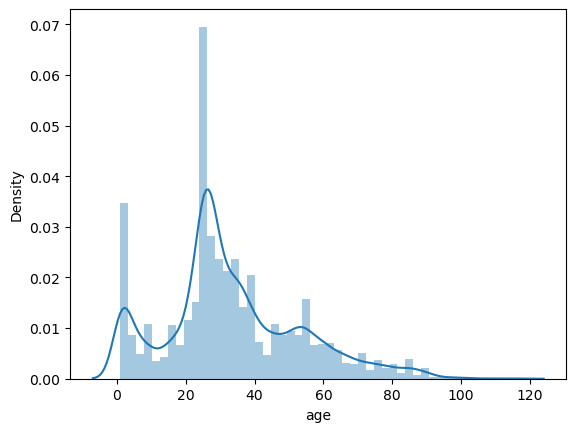

In [6]:
sns.distplot(df['age'])

In [7]:
df['gender'].value_counts()

0    12391
1    11317
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

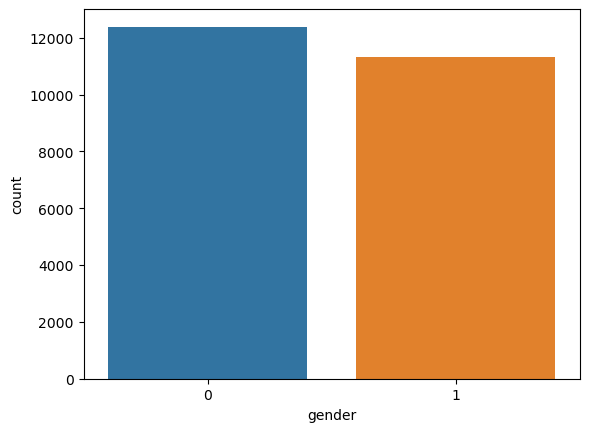

In [8]:
sns.countplot(data=df, x='gender')

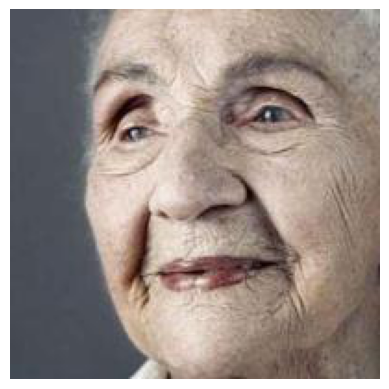

In [9]:
from PIL import Image
img = Image.open(df['image'][3])
plt.axis('off')
plt.imshow(img)

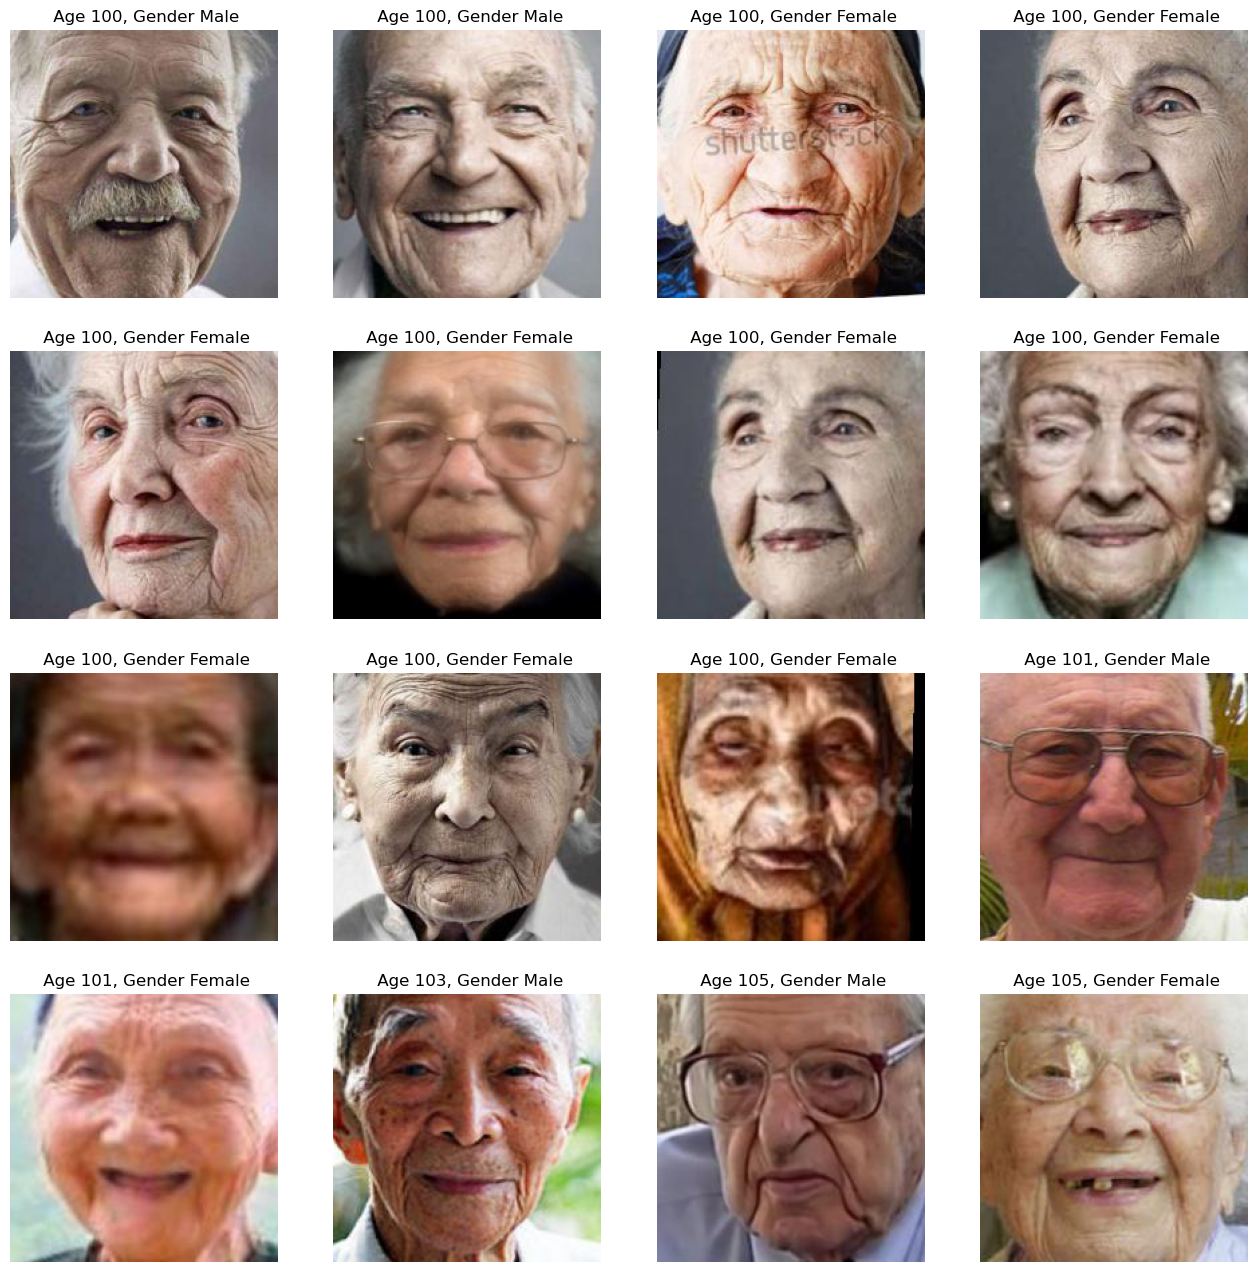

In [10]:
plt.figure(figsize=(16,16))
sample = df.iloc[0:16]
for index, image, gender, age in sample.itertuples():
    plt.subplot(4,4,index+1)
    img = load_img(image)
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f' Age {age}, Gender {gender_dict[gender]}')

In [11]:
def extract_feature(images):
    features=[]
    for image in images:
        img = load_img(image, grayscale=True)
        #Image.ANTIALIAS-->prevent distortion in img while resize 
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),128,128,1)
    return features

In [12]:
X = extract_feature(df['image'])

In [13]:
 X.shape

(23708, 128, 128, 1)

In [14]:
X = X/255.0

In [15]:
input_shape = (128,128,1)

In [16]:
inputs = Input((input_shape))
#convolutional layers
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2)) (conv_4)

flatten = Flatten() (maxp_4)
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1 , activation='sigmoid', name='gender_out') (dense_1)
output_2 = Dense(1 , activation='relu', name='age_out') (dense_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 32)         320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 61, 61, 64)           18496     ['max_pooling2d[0][0]']   

In [18]:
from keras.utils import plot_model
plot_model(model,rankdir='LR')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [20]:
from keras.utils import plot_model
plot_model(model,rankdir='LR')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [22]:
y_gender, y_age = df['gender'], df['age']

In [23]:
history = model.fit(x=X, y=[y_gender,y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 231s 386ms/step - loss: 10.4398 - gender_out_loss: 0.6487 - age_out_loss: 9.7912 - gender_out_accuracy: 0.5962 - age_out_accuracy: 0.0565 - val_loss: 32.4626 - val_gender_out_loss: 0.5395 - val_age_out_loss: 31.9230 - val_gender_out_accuracy: 0.7313 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
593/593 [==============================] - 232s 391ms/step - loss: 7.6529 - gender_out_loss: 0.4020 - age_out_loss: 7.2508 - gender_out_accuracy: 0.8178 - age_out_accuracy: 0.0295 - val_loss: 30.2295 - val_gender_out_loss: 0.4613 - val_age_out_loss: 29.7682 - val_gender_out_accuracy: 0.7809 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
593/593 [==============================] - 242s 408ms/step - loss: 6.7659 - gender_out_loss: 0.3317 - age_out_loss: 6.4343 - gender_out_accuracy: 0.8528 - age_out_accuracy: 0.0164 - val_loss: 27.0996 - val_gender_out_loss: 0.4440 - val_age_out_loss: 26.6556 - val_gender_out_accuracy: 0.7927 - val_age_out_accura

<Figure size 640x480 with 0 Axes>

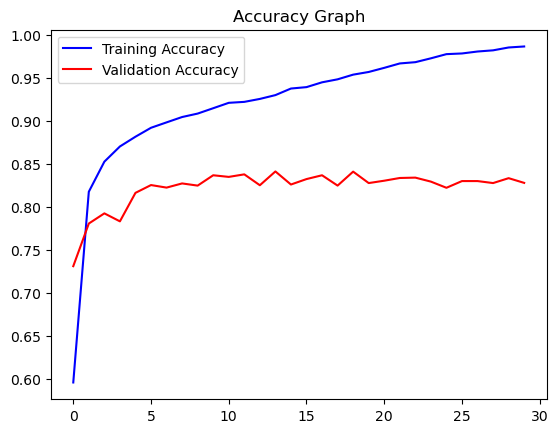

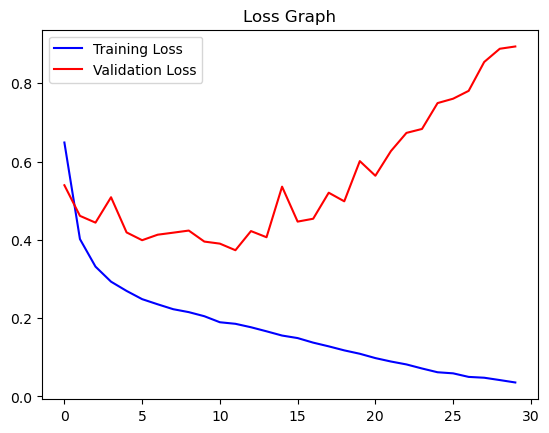

<Figure size 640x480 with 0 Axes>

In [24]:
#Gender Graph
acc = history.history['gender_out_accuracy']
val_acc =  history.history['val_gender_out_accuracy']
n_epoch = range(len(acc))

plt.plot(n_epoch, acc, 'b', label='Training Accuracy')
plt.plot(n_epoch, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss =  history.history['val_gender_out_loss']
epoch = len(acc)

plt.plot(n_epoch, loss, 'b', label='Training Loss')
plt.plot(n_epoch, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

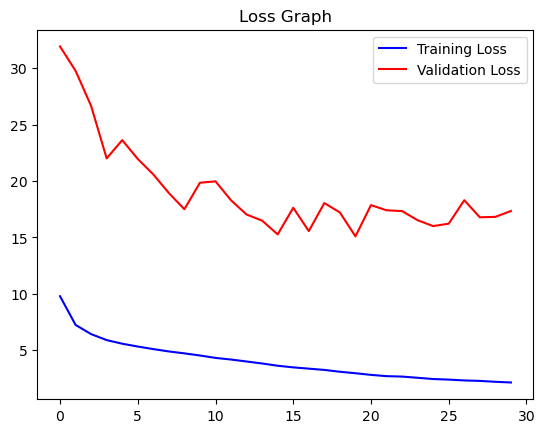

<Figure size 640x480 with 0 Axes>

In [25]:
#Age Graph
loss = history.history['age_out_loss']
val_loss =  history.history['val_age_out_loss']
epoch = range(len(acc))

plt.plot(epoch, loss, 'b', label='Training Loss')
plt.plot(epoch, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()

In [26]:
X[100].shape

(128, 128, 1)

True Gender:  Male True Age 10
1/1 [==============================] - 0s 230ms/step
Prediceted Gender:  Male Predicted Age 10


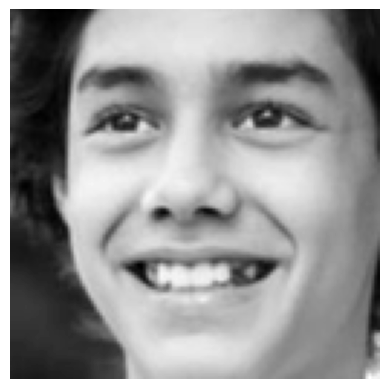

In [27]:
image_index = 100
print("True Gender: ",gender_dict[y_gender[image_index]], "True Age", y_age[image_index])

pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender =gender_dict[ round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Prediceted Gender: ",pred_gender, "Predicted Age", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128), cmap='gray')

True Gender:  Female True Age 10
1/1 [==============================] - 0s 18ms/step
Prediceted Gender:  Female Predicted Age 10


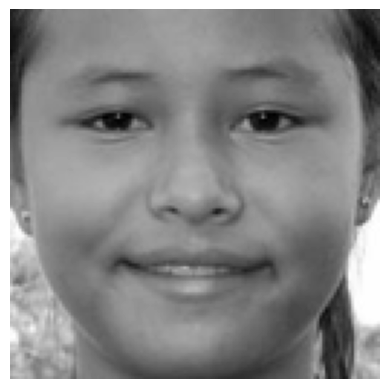

In [28]:
image_index = 150
print("True Gender: ",gender_dict[y_gender[image_index]], "True Age", y_age[image_index])

pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender =gender_dict[ round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Prediceted Gender: ",pred_gender, "Predicted Age", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128), cmap='gray')

True Gender:  Female True Age 22
1/1 [==============================] - 0s 24ms/step
Prediceted Gender:  Female Predicted Age 22


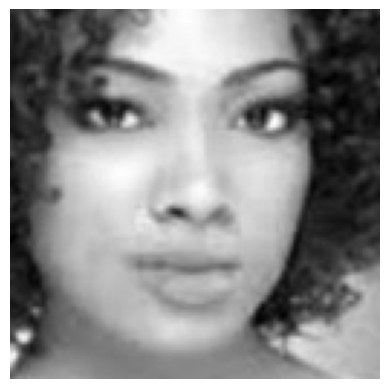

In [29]:
image_index = 3500
print("True Gender: ",gender_dict[y_gender[image_index]], "True Age", y_age[image_index])

pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender =gender_dict[ round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Prediceted Gender: ",pred_gender, "Predicted Age", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128), cmap='gray')